In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/6200project-guo/Epileptic Seizure Recognition.csv')
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
data['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


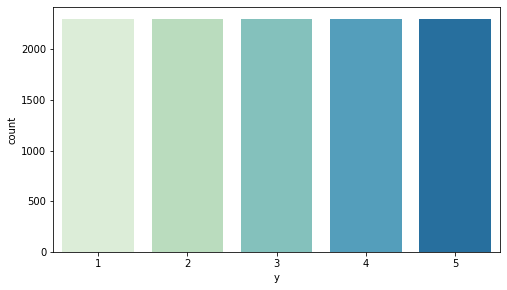

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(data['y'], palette='GnBu')
plt.show()

### **binary classification, namely class 1 (Epileptic seizure) against the rest.**

In [ ]:
y_len = len(data['y'])
for i in range(y_len):
  if data['y'][i] != 1:
    data['y'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


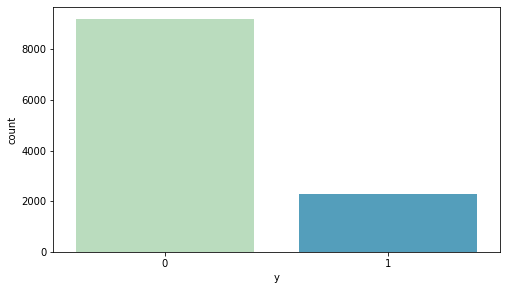

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(data['y'],hue_order='y',palette='GnBu')
plt.show()

In [ ]:
data = data.drop('Unnamed',axis=1)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
# Missing values
data.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

### So, there is no missing values

### Data splitting

In [ ]:
X = data.drop('y', axis=1)
y = data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [ ]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
10131,-5,32,32,-2,-59,-146,-180,-164,-80,79,...,330,329,317,299,281,277,274,269,270,275
11133,-141,-253,-553,-952,-1184,-1045,-560,-16,379,633,...,6,-208,-524,-981,-1334,-1438,-1178,-720,-219,187
1258,29,56,83,81,72,51,41,41,60,63,...,123,105,102,106,113,109,107,122,113,112
4217,24,31,44,66,97,129,153,143,102,60,...,41,59,62,42,3,-36,-81,-95,-80,-50
9135,50,47,27,11,1,-11,-45,-62,-73,-79,...,-52,-49,-31,1,45,68,81,63,46,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,-67,-66,-72,-65,-48,-35,-22,-1,5,20,...,-91,-103,-118,-134,-153,-166,-159,-147,-121,-144
7443,-75,-101,-125,-139,-131,-99,-61,-46,-34,-22,...,-64,-62,-56,-44,-22,-9,-8,-30,-47,-65
4182,-92,-106,-108,-108,-100,-96,-97,-103,-115,-137,...,233,421,434,403,366,312,240,160,87,24
4820,56,20,-31,-82,-122,-134,-122,-87,-44,-19,...,58,-20,-107,-175,-210,-206,-153,-77,17,108


In [ ]:
from sklearn.decomposition import PCA
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca_f.fit(X_train)
X_train_f = pca_f.transform(X_train)
components = X_train_f.shape[1]
components

43

In [ ]:
pca = PCA()
pca = pca.fit(X_train)
newX_train = pca.transform(X_train)     #等价于pca.fit(X) pca.transform(X)

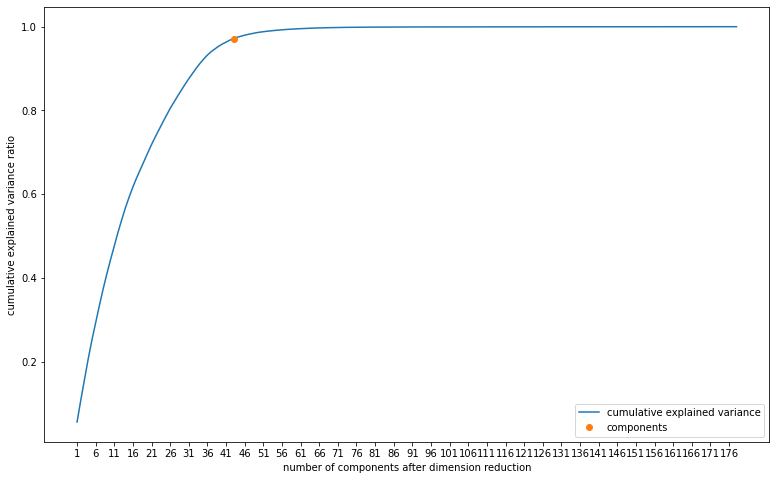

In [ ]:
plt.figure(figsize=(13,8))
list_xticks = list(range(1,179))
list_xticks2 = list(range(1,179,5))
plt.plot(list_xticks, np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.xticks(list_xticks2) #这是为了限制坐标轴显示为整数
plt.plot(components, pca_f.explained_variance_ratio_.sum(), 'o', label='components')
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.legend()
plt.show()

In [ ]:
pca_final = PCA(n_components=components)
pca_final = pca_final.fit(X_train)
X_train = pca_final.transform(X_train)
X_test = pca_final.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-465.997780,-91.773558,-89.454208,914.661838,519.819724,-19.728427,265.022317,1240.354770,713.598950,-456.337836,...,32.199686,75.547028,-34.982466,448.589910,210.258554,4.589245,-36.720158,64.809703,-26.562898,-4.201259
1,-25.227998,910.413401,-1290.080026,-418.990525,-1788.568491,3619.358541,-2428.276529,1408.020065,-749.711551,-2014.429925,...,521.204420,923.627719,367.506311,918.657756,303.482860,-1171.704270,-506.936077,507.199117,437.893011,361.897984
2,-3.653217,-11.274853,18.052956,108.499451,227.444752,289.883980,329.371467,377.195206,-198.069958,175.151693,...,-72.622702,37.161846,-40.043558,28.165602,5.884969,5.112575,20.552755,32.997901,-25.288709,18.750013
3,-15.989260,-20.168107,21.900911,-56.129033,41.302880,328.218671,134.559665,164.724272,-61.763626,164.073063,...,69.840753,3.595920,31.768603,-107.094522,14.988292,22.469313,-64.451765,0.059961,0.003586,-3.482621
4,-144.937308,-60.401571,-0.968282,-143.034417,149.517496,44.131903,-1.540230,216.469155,-255.182315,153.431446,...,52.570656,93.885620,-55.157335,-11.832935,-29.235198,50.372486,41.600976,-66.813093,75.942458,-38.319473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,291.122200,457.911268,-249.862951,-348.339741,-194.061778,-62.758639,159.987451,302.613066,403.342845,-642.785946,...,69.847630,-155.064149,150.882248,-102.596573,22.186871,42.795082,82.487344,176.701152,-175.938590,163.868856
9196,-153.645710,-104.687864,151.179858,-38.258534,-159.222495,-196.032808,-280.471668,-108.116655,171.288210,-70.465799,...,64.830859,-0.644845,68.754183,18.017167,32.912219,6.373935,-3.374036,-50.999680,77.847523,-15.895282
9197,-717.994047,101.399069,73.997052,1057.365094,-1794.092500,-558.457167,1044.712686,-731.418966,-296.491371,745.151032,...,-171.924725,-605.632654,471.860292,-173.278100,344.019991,-331.346145,-231.785751,316.086751,-11.222177,272.023862
9198,171.150694,-2.147341,-107.726293,-46.303815,-11.592133,13.582604,-131.367637,13.259773,47.004662,315.289928,...,64.152271,22.670532,-171.392310,177.699895,33.261921,-44.862090,-64.796438,-59.055669,-4.331993,96.430235


In [ ]:
y_train.shape

(9200,)

In [ ]:
y_train.value_counts()

0    7320
1    1880
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


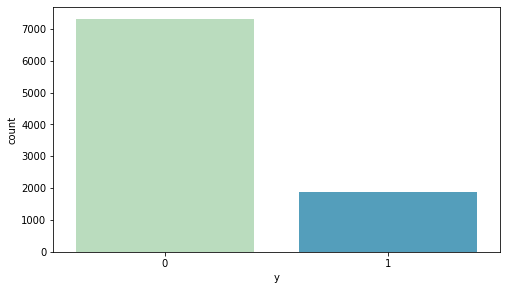

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train, palette='GnBu')
plt.show()

### **Oversampling**

In [ ]:
ros = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
X_train_resampled

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-465.997780,-91.773558,-89.454208,914.661838,519.819724,-19.728427,265.022317,1240.354770,713.598950,-456.337836,...,32.199686,75.547028,-34.982466,448.589910,210.258554,4.589245,-36.720158,64.809703,-26.562898,-4.201259
1,-25.227998,910.413401,-1290.080026,-418.990525,-1788.568491,3619.358541,-2428.276529,1408.020065,-749.711551,-2014.429925,...,521.204420,923.627719,367.506311,918.657756,303.482860,-1171.704270,-506.936077,507.199117,437.893011,361.897984
2,-3.653217,-11.274853,18.052956,108.499451,227.444752,289.883980,329.371467,377.195206,-198.069958,175.151693,...,-72.622702,37.161846,-40.043558,28.165602,5.884969,5.112575,20.552755,32.997901,-25.288709,18.750013
3,-15.989260,-20.168107,21.900911,-56.129033,41.302880,328.218671,134.559665,164.724272,-61.763626,164.073063,...,69.840753,3.595920,31.768603,-107.094522,14.988292,22.469313,-64.451765,0.059961,0.003586,-3.482621
4,-144.937308,-60.401571,-0.968282,-143.034417,149.517496,44.131903,-1.540230,216.469155,-255.182315,153.431446,...,52.570656,93.885620,-55.157335,-11.832935,-29.235198,50.372486,41.600976,-66.813093,75.942458,-38.319473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,-268.723213,-204.351384,-69.846767,-411.981650,-327.810728,-62.688131,-494.048810,-74.279633,396.605089,-105.193411,...,-159.354861,-0.040458,188.949376,-5.386888,-28.573115,17.155183,58.843512,-14.430136,26.481143,-83.300085
14636,-2054.384182,-736.298004,-453.373598,785.433494,-1000.502032,-416.148987,2143.464188,-313.763421,1034.000163,255.708044,...,-189.700711,92.716266,-37.233805,-129.628995,-263.920051,332.312823,-22.913477,-68.499802,-119.662496,-108.596833
14637,-1082.950809,884.195723,-1662.069038,-265.462788,53.718851,-324.411815,505.898621,-263.930210,-184.281826,-578.473312,...,-80.119530,267.582680,401.225051,-111.297704,-323.279447,-25.470487,-147.620764,5.144602,188.077425,97.522528
14638,-1367.890143,1556.696705,-226.636269,-1840.819809,-443.181480,-674.017326,-485.395615,-482.736195,-567.306914,836.461744,...,-259.818814,386.901667,105.292854,48.672137,-169.383334,281.257622,-156.387583,64.301966,-2.937707,-20.930922


In [ ]:
columns_list = list(X_train_resampled.columns)

In [ ]:
y_train_resampled.shape

(14640,)

In [ ]:
y_train_resampled.value_counts()

1    7320
0    7320
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


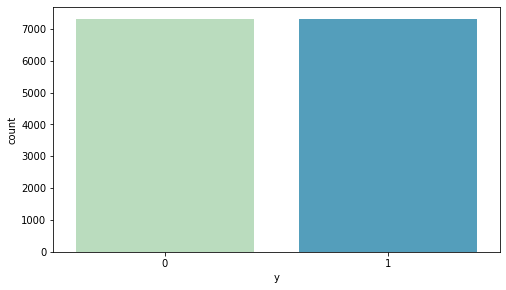

In [ ]:
plt.figure(figsize=(8,4.5))
sns.countplot(y_train_resampled, palette='GnBu')
plt.show()

### **Normalization**

In [ ]:
std = StandardScaler().fit(X_train_resampled)
X_train_resampled = pd.DataFrame(std.transform(X_train_resampled))
X_test = pd.DataFrame(std.transform(X_test))

In [ ]:
X_train_resampled.columns = columns_list
X_train_resampled
X_test.columns = columns_list
X_test

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-1.738375,0.157324,2.147641,-0.843101,2.513941,1.796255,-1.836395,-0.108261,1.397769,0.774795,...,0.904623,0.508782,0.390968,-1.957101,-0.535130,0.198811,0.095537,-0.055194,0.434440,-0.237361
1,0.161534,0.041127,0.264286,-0.082351,-0.255492,-0.731739,-0.158231,-0.639714,0.731402,-0.710845,...,-0.027936,-0.019364,-0.126414,-0.075685,-0.123908,0.070777,0.109346,0.407556,-0.174644,0.087721
2,-0.147449,0.030462,-0.158860,-0.099808,0.107750,0.296493,0.095248,0.505550,-0.033960,-0.188200,...,0.030475,0.039454,0.148620,-0.106706,-0.227047,0.019369,0.107682,0.097322,-0.109341,-0.299835
3,0.290864,-0.142264,0.422794,0.018962,-1.547449,-0.628179,0.766411,-0.391324,-0.991629,-0.068106,...,0.626082,1.540659,0.217454,-2.009964,2.929079,-0.698564,1.481992,2.012015,0.561410,-1.542596
4,0.037005,-0.050002,0.014089,0.043674,0.183374,0.143472,0.291138,0.584581,-0.182995,0.315919,...,0.052768,0.028053,-0.035499,0.030098,-0.063743,0.016971,0.058261,0.098403,-0.033322,-0.010526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,-0.195816,-0.220520,2.460267,-0.770668,-1.429360,0.568712,-0.649335,-0.627474,1.296705,-0.376017,...,1.853724,0.120900,-1.556062,-0.578160,0.771907,-0.364948,1.073404,-1.150003,3.161511,0.071033
2296,0.248195,0.237932,-0.337183,-0.856053,0.412882,0.631691,-0.109718,-0.201882,0.389178,0.678185,...,-0.045645,0.079955,0.491263,0.258749,-0.248611,0.300672,-0.348906,-0.403053,-0.457421,0.486675
2297,-0.132120,-0.109798,0.065239,-0.016110,0.231321,0.074628,-0.049230,0.235683,-0.041082,-0.029849,...,0.346857,0.328888,-0.394506,-0.044766,-0.270509,-0.374329,-0.318520,0.018512,-0.004545,-0.048892
2298,0.041549,-0.030757,-0.201519,-0.008240,0.100594,0.659669,0.067602,-0.010429,-1.205581,0.360163,...,0.042637,-0.109562,0.170631,-0.500642,0.080143,0.052498,-0.256451,-0.035736,-0.004507,-0.108794


### **Application of models**

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score, classification_report, precision_recall_curve
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve

In [ ]:
def plot_LearningCurv(model):
  loglc = LearningCurve(model,  title='Learning Curve', scoring='accuracy')
  loglc.fit(X_train_resampled, y_train_resampled)
  loglc.finalize()

In [ ]:
def plot_RoC(model):
  logrocauc = ROCAUC(model, classes=['False', 'True'],
  title='ROC AUC Plot', binary=True)
  logrocauc.fit(X_train_resampled, y_train_resampled)
  logrocauc.score(X_test, y_test)
  logrocauc.finalize()
  plt.show()

In [ ]:
from inspect import classify_class_attrs
# train a dummy model
dummy = DummyClassifier()
dummy.fit(X_train_resampled, y_train_resampled)
dummy_pred = dummy.predict(X_test)

dummy_accuracy = accuracy_score(y_test, dummy_pred)
dummy_precision = precision_score(y_test, dummy_pred, average = "weighted")
dummy_recall = recall_score(y_test, dummy_pred, average = "weighted")
dummy_f1 = f1_score(y_test, dummy_pred, average = "weighted")

print("The accuracy of Dummy classification is ", dummy_accuracy)
print("The precision score of Dummy classification is ", dummy_precision)
print("The recall score of Dummy classification is ", dummy_recall)
print("The F1-score of Dummy classification is ", dummy_f1)
print(classification_report(y_test,dummy_pred))
con_mrix = confusion_matrix(y_test,dummy_pred)
print("The confusion_matrix of Dummy classification is ", con_mrix)

The accuracy of Dummy classification is  0.8173913043478261
The precision score of Dummy classification is  0.6681285444234405
The recall score of Dummy classification is  0.8173913043478261
The F1-score of Dummy classification is  0.7352610775951738
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1880
           1       0.00      0.00      0.00       420

    accuracy                           0.82      2300
   macro avg       0.41      0.50      0.45      2300
weighted avg       0.67      0.82      0.74      2300

The confusion_matrix of Dummy classification is  [[1880    0]
 [ 420    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 

.:. Dummy Classifier Accuracy: 81.74% .:.


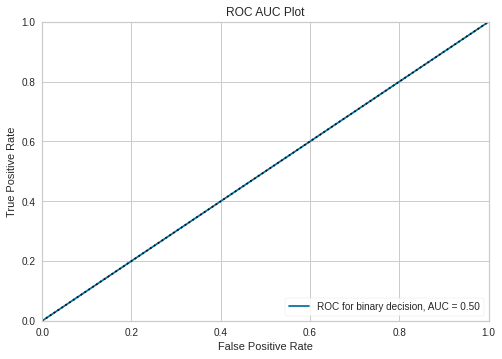

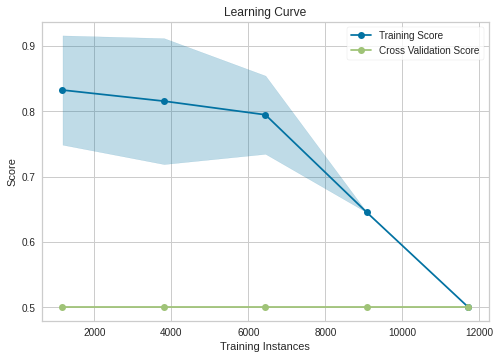

In [ ]:
print('.:. Dummy Classifier Accuracy:'+'\033[1m {:.2f}%'.format(dummy_accuracy*100)+' .:.')
plot_RoC(dummy)
plot_LearningCurv(dummy)

In [ ]:
# train a logistic model
log = LogisticRegression()
log.fit(X_train_resampled, y_train_resampled)
log_pred = log.predict(X_test)

log_accuracy = accuracy_score(y_test, log_pred)
log_precision = precision_score(y_test, log_pred, average = "weighted")
log_recall = recall_score(y_test, log_pred, average = "weighted")
log_f1 = f1_score(y_test, log_pred, average = "weighted")

print("The accuracy of Logistic Regression is ", log_accuracy)
print("The precision score of Logistic Regression is ", log_precision)
print("The recall score of Logistic Regression is ", log_recall)
print("The F1-score of Logistic Regression is ", log_f1)
print(classification_report(y_test,log_pred))

The accuracy of Logistic Regression is  0.6204347826086957
The precision score of Logistic Regression is  0.7354252983742586
The recall score of Logistic Regression is  0.6204347826086957
The F1-score of Logistic Regression is  0.6602198141680925
              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1880
           1       0.23      0.47      0.31       420

    accuracy                           0.62      2300
   macro avg       0.54      0.56      0.53      2300
weighted avg       0.74      0.62      0.66      2300



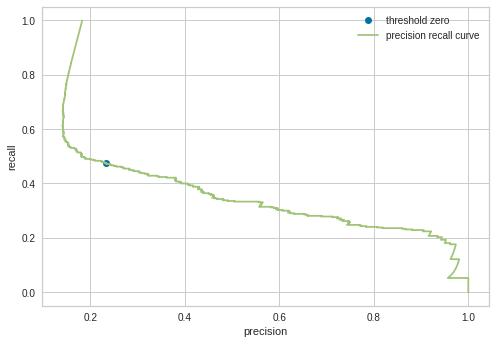

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, log.decision_function(X_test))
# 找到最接近0的阈值（默认阈值）
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', label='threshold zero')

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')
# 曲线上的每一个点都对应decision_function的一个可能的阈值。曲线越靠近右上角，则分类器越好。

.:. Logistic Regression Accuracy: 62.04% .:.


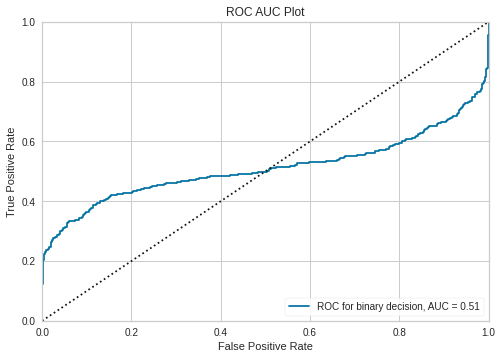

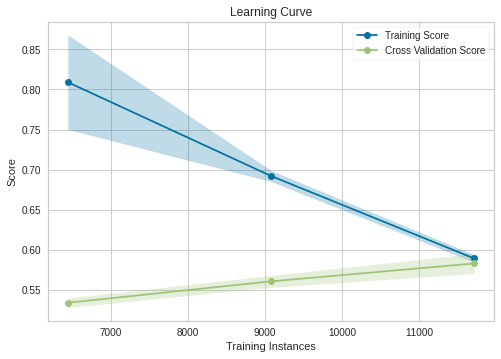

In [ ]:
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(log_accuracy*100)+' .:.')
plot_RoC(log)
plot_LearningCurv(log)

In [ ]:
# train a Random Forest Model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_resampled, y_train_resampled)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average = "weighted")
rf_recall = recall_score(y_test, rf_pred, average = "weighted")
rf_f1 = f1_score(y_test, rf_pred, average = "weighted")

print("The accuracy of Random Forest is ", rf_accuracy)
print("The precision score of Random Forest is ", rf_precision)
print("The recall score of Random Forest is ", rf_recall)
print("The F1-score of Random Forest is ", rf_f1)
print(classification_report(y_test,rf_pred))
con_mrix = confusion_matrix(y_test,rf_pred)
print("The confusion_matrix of Random Forest is ", con_mrix)

The accuracy of Random Forest is  0.9734782608695652
The precision score of Random Forest is  0.9740506134762095
The recall score of Random Forest is  0.9734782608695652
The F1-score of Random Forest is  0.9736810835894735
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1880
           1       0.91      0.95      0.93       420

    accuracy                           0.97      2300
   macro avg       0.95      0.96      0.96      2300
weighted avg       0.97      0.97      0.97      2300

The confusion_matrix of Random Forest is  [[1841   39]
 [  22  398]]


.:. Random Forest Accuracy: 97.35% .:.


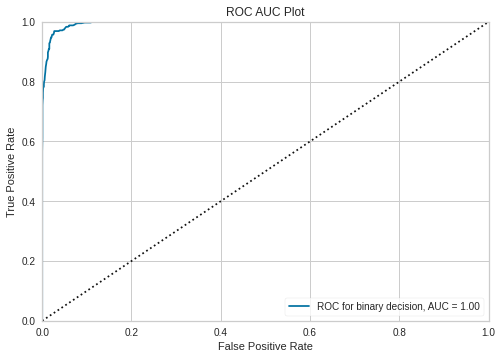

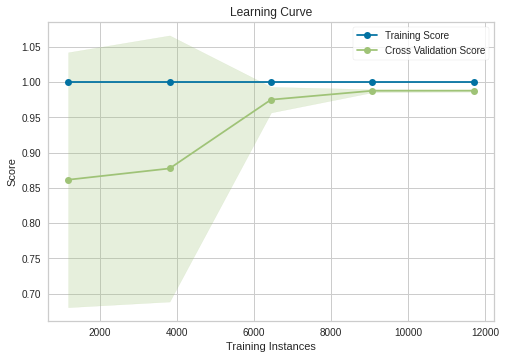

In [ ]:
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(rf_accuracy*100)+' .:.')
plot_RoC(rf)
plot_LearningCurv(rf)

In [ ]:
# train a svm model
sv = SVC()
sv.fit(X_train_resampled, y_train_resampled)
sv_pred = sv.predict(X_test)

sv_accuracy = accuracy_score(y_test, sv_pred)
sv_precision = precision_score(y_test, sv_pred, average = "weighted")
sv_recall = recall_score(y_test, sv_pred, average = "weighted")
sv_f1 = f1_score(y_test, sv_pred, average = "weighted")

print("The accuracy of Support Vector Machine  is ", sv_accuracy)
print("The precision score of Support Vector Machine  is ", sv_precision)
print("The recall score of Support Vector Machine  is ", sv_recall)
print("The F1-score of Support Vector Machine  is ", sv_f1)

The accuracy of Support Vector Machine  is  0.9669565217391304
The precision score of Support Vector Machine  is  0.9675785055064703
The recall score of Support Vector Machine  is  0.9669565217391304
The F1-score of Support Vector Machine  is  0.9671947335701907


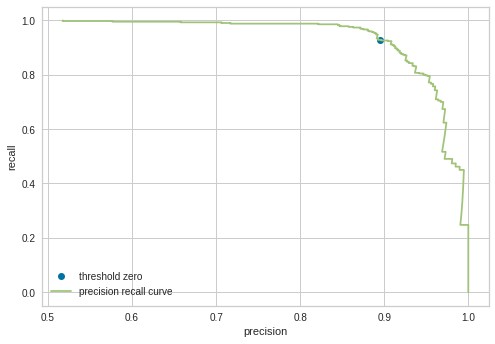

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, sv.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', label='threshold zero')

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')

.:. SVM Accuracy: 96.70% .:.


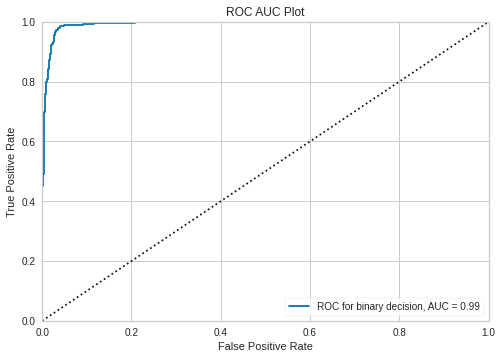

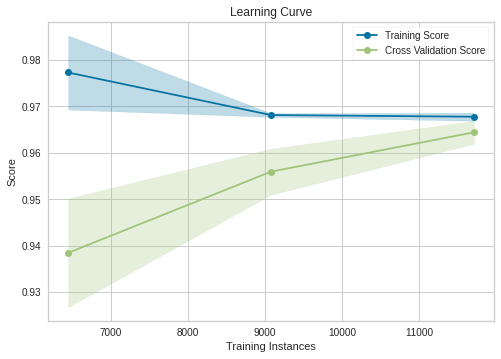

In [ ]:
print('.:. SVM Accuracy:'+'\033[1m {:.2f}%'.format(sv_accuracy*100)+' .:.')
plot_RoC(sv)
plot_LearningCurv(sv)

In [ ]:
GBclassifier = GradientBoostingClassifier(random_state=1)

GBclassifier.fit(X_train_resampled, y_train_resampled)
GB_pred = GBclassifier.predict(X_test)

GB_accuracy = accuracy_score(y_test, GB_pred)
GB_precision = precision_score(y_test, GB_pred, average = "weighted")
GB_recall = recall_score(y_test, GB_pred, average = "weighted")
GB_f1 = f1_score(y_test, GB_pred, average = "weighted")

print("The accuracy of GradientBoostingClassifier  is ", GB_accuracy)
print("The precision score of GradientBoostingClassifier  is ", GB_precision)
print("The recall score of GradientBoostingClassifier  is ", GB_recall)
print("The F1-score of GradientBoostingClassifier  is ", GB_f1)

The accuracy of GradientBoostingClassifier  is  0.9691304347826087
The precision score of GradientBoostingClassifier  is  0.9702779001267827
The recall score of GradientBoostingClassifier  is  0.9691304347826087
The F1-score of GradientBoostingClassifier  is  0.96949946623278


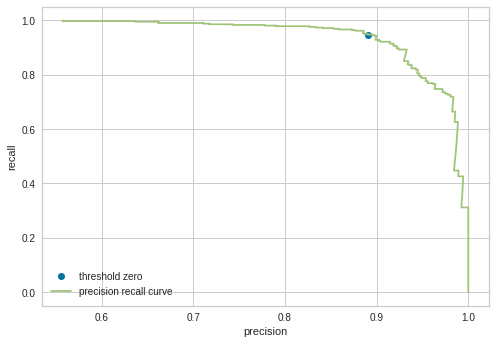

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, GBclassifier.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', label='threshold zero')

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')

.:. GradientBoostingClassifier Accuracy: 96.70% .:.


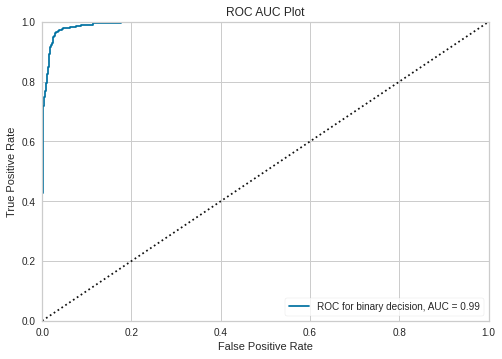

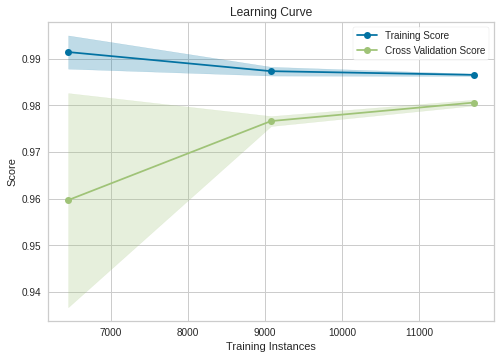

In [ ]:
print('.:. GradientBoostingClassifier Accuracy:'+'\033[1m {:.2f}%'.format(sv_accuracy*100)+' .:.')
plot_RoC(GBclassifier)
plot_LearningCurv(GBclassifier)

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Dummy Classifier', 'Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Gradient Boosting'
                                  ], 
                        'Accuracy': [dummy_accuracy*100, log_accuracy*100, rf_accuracy*100, sv_accuracy*100, GB_accuracy*100,]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='BuGn').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,97.347826
Gradient Boosting,96.913043
Support Vector Machine,96.695652
Dummy Classifier,81.739130
Logistic Regression,62.043478


In [ ]:
# Cross Validation
dummy2 = DummyClassifier()
dummy_cv = cross_val_score(dummy2, X_train_resampled, y_train_resampled, scoring='accuracy', cv=3)
dummy_cv

array([0.5, 0.5, 0.5])

In [ ]:
log2 = LogisticRegression()
log_cv = cross_val_score(log2, X_train_resampled, y_train_resampled, scoring='accuracy', cv=3)
log_cv

array([0.57909836, 0.58114754, 0.58790984])

In [ ]:
rf2 = RandomForestClassifier(random_state=1)
rf_cv = cross_val_score(rf2, X_train_resampled, y_train_resampled, scoring='accuracy', cv=3)
rf_cv

array([0.9852459 , 0.98545082, 0.98545082])

In [ ]:
sv2 = SVC()
sv_cv = cross_val_score(sv2, X_train_resampled, y_train_resampled, scoring='accuracy', cv=3)
sv_cv

array([0.96290984, 0.96086066, 0.9625    ])

In [ ]:
GB2 = GradientBoostingClassifier(random_state=1)
GB_cv = cross_val_score(GB2, X_train_resampled, y_train_resampled, scoring='accuracy', cv=3)
GB_cv

array([0.98135246, 0.97520492, 0.9807377 ])

In [ ]:
model_names = ["Dummy_classifier", "Logistic Regression", "Random Forest","Support Vector Machine","GradientBoostingClassifier"]

cv_mean = []
cv_mean.append(dummy_cv.mean())
cv_mean.append(log_cv.mean())
cv_mean.append(rf_cv.mean())
cv_mean.append(sv_cv.mean())
cv_mean.append(GB_cv.mean())

In [ ]:
cv_df = pd.DataFrame({
    "Model": model_names,
    "cross validation score": cv_mean
})
cv_df.sort_values(by='cross validation score', ascending=False)

,Model,cross validation score
2,Random Forest,0.985383
4,GradientBoostingClassifier,0.979098
3,Support Vector Machine,0.962090
1,Logistic Regression,0.582719
0,Dummy_classifier,0.500000
